In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.fftpack

In [12]:
Alwidths = [0, 45, 935, 2550]
Pbwidths = [0, 0.8, 1.6, 3.2]

Alfolder = ['p0_SinObstaculo', 'p6_Al_45mm', 'p4_Al_935mm', 'p1_Al_2550mm']
Pbfolder = ['p0_SinObstaculo', 'p2_Pb_0-8mm', 'p7_Pb_1-6mm', 'p5_Pb_3-2mm']

W_Al = np.array(Alwidths)
W_Pb = np.array(Pbwidths)

V_Al = np.array([])
V_Pb = np.array([])

Vstd10_Al = np.array([])
Vstd10_Pb = np.array([])

C_Al = np.array([])
C_Pb = np.array([])

Cstd10_Al = np.array([])
Cstd10_Pb = np.array([])

for i in range(4):
    df_Al=pd.read_csv(Alfolder[i]+'/anag1.csv', header=None, squeeze = True)
    df_Pb=pd.read_csv(Pbfolder[i]+'/anag1.csv', header=None, squeeze = True)
    
    V_Al = np.append(V_Al,np.mean(df_Al[1:])*5/4095)
    V_Pb = np.append(V_Pb,np.mean(df_Pb[1:])*5/4095)
    
    V_10s_Al=[np.mean(df_Al[1:10000])]
    V_10s_Pb=[np.mean(df_Pb[1:10000])]
    
    for j in range(29):
        V_10s_Al.append(np.mean(df_Al[10000*(j+1):10000*(j+2)]))
        V_10s_Pb.append(np.mean(df_Pb[10000*(j+1):10000*(j+2)]))
    
    Vstd10_Al = np.append(Vstd10_Al,np.std(V_10s_Al)*5/4095)
    Vstd10_Pb = np.append(Vstd10_Pb,np.std(V_10s_Pb)*5/4095)

    df_Al=pd.read_csv(Alfolder[i]+'/anag2.csv', header=None, squeeze = True)
    df_Pb=pd.read_csv(Pbfolder[i]+'/anag2.csv', header=None, squeeze = True)

    Caux_Al = [np.sum(df_Al[1:1000])]
    Caux_Pb = [np.sum(df_Pb[1:1000])]
    
    for j in range(299):
        Caux_Al.append(np.sum(df_Al[1000*(j+1):1000*(j+2)]))
        Caux_Pb.append(np.sum(df_Pb[1000*(j+1):1000*(j+2)]))
        
    C_Al = np.append(C_Al,np.mean(Caux_Al))
    C_Pb = np.append(C_Pb,np.mean(Caux_Al))
    
    Caux10_Al = []
    Caux10_Pb = []
    
    for j in range(30):
        Caux10_Al.append(np.mean(Caux_Al[10*j:10*(j+1)]))
        Caux10_Pb.append(np.mean(Caux_Pb[10*j:10*(j+1)]))
        
    Cstd10_Al = np.append(Cstd10_Al,np.std(Caux10_Al))
    Cstd10_Pb = np.append(Cstd10_Pb,np.std(Caux10_Pb))
    

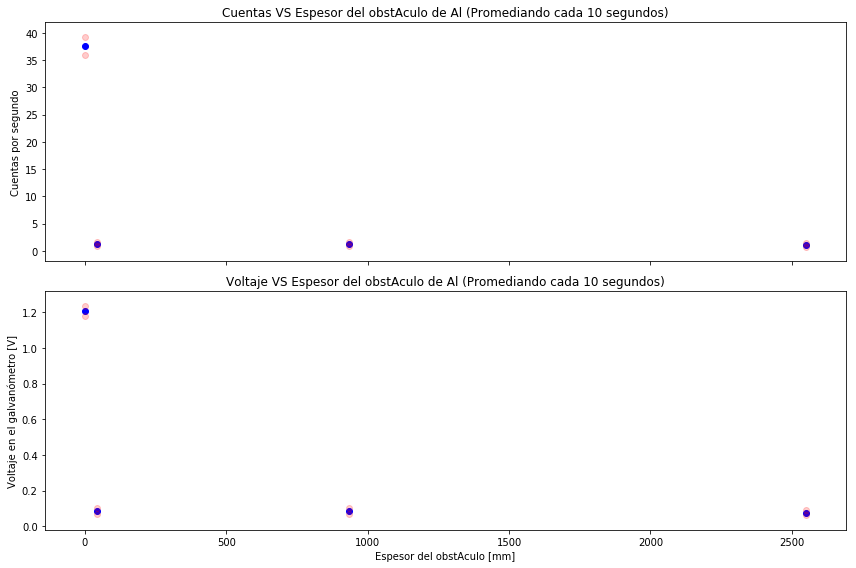

In [21]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].scatter(W_Al,C_Al, color='blue')
ax[0].scatter(W_Al,C_Al+Cstd10_Al, color='red', alpha=0.2)
ax[0].scatter(W_Al,C_Al-Cstd10_Al, color='red', alpha=0.2)
#ax[0].fill_between(d, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
#ax[0].fill_betweenx(C, d+1, d-1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Espesor del obstAculo de Al (Promediando cada 10 segundos)')

ax[1].scatter(W_Al,V_Al, color='blue')
ax[1].scatter(W_Al,V_Al+Vstd10_Al, color='red', alpha=0.2)
ax[1].scatter(W_Al,V_Al-Vstd10_Al, color='red', alpha=0.2)
#ax[1].fill_between(d, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
#ax[1].fill_betweenx(V, d+1, d-1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Espesor del obstAculo [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Espesor del obstAculo de Al (Promediando cada 10 segundos)')

fig.tight_layout()

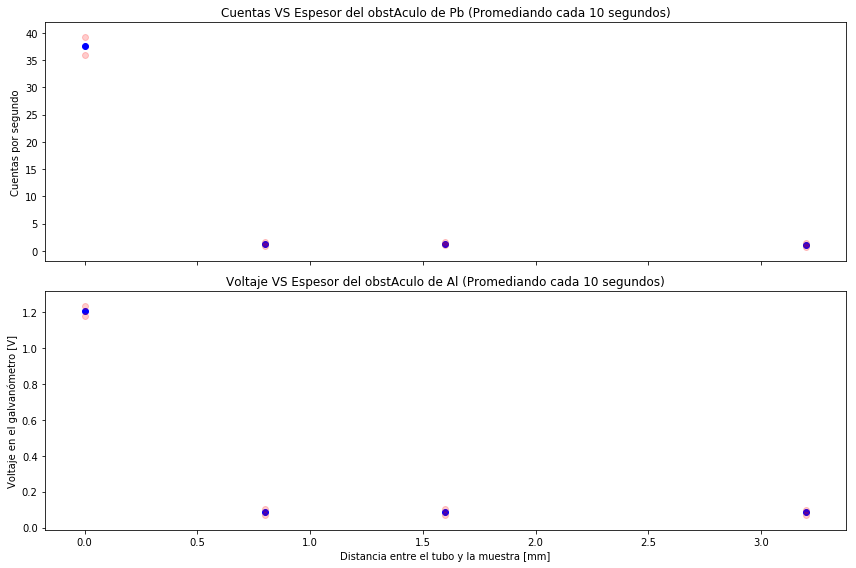

In [22]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ax[0].scatter(W_Pb,C_Pb, color='blue')
ax[0].scatter(W_Pb,C_Pb+Cstd10_Pb, color='red', alpha=0.2)
ax[0].scatter(W_Pb,C_Pb-Cstd10_Pb, color='red', alpha=0.2)
#ax[0].fill_between(d, C+Cstd10, C-Cstd10, facecolor='red', alpha=0.1)
#ax[0].fill_betweenx(C, d+1, d-1, facecolor='red', alpha=0.1)
ax[0].set_ylabel('Cuentas por segundo')
ax[0].set_title('Cuentas VS Espesor del obstAculo de Pb (Promediando cada 10 segundos)')

ax[1].scatter(W_Pb,V_Pb, color='blue')
ax[1].scatter(W_Pb,V_Pb+Vstd10_Pb, color='red', alpha=0.2)
ax[1].scatter(W_Pb,V_Pb-Vstd10_Pb, color='red', alpha=0.2)
#ax[1].fill_between(d, V+Vstd10, V-Vstd10, facecolor='red', alpha=0.1)
#ax[1].fill_betweenx(V, d+1, d-1, facecolor='red', alpha=0.1)
ax[1].set_xlabel('Distancia entre el tubo y la muestra [mm]')
ax[1].set_ylabel('Voltaje en el galvanómetro [V]')
ax[1].set_title('Voltaje VS Espesor del obstAculo de Al (Promediando cada 10 segundos)')

fig.tight_layout()

In [24]:
V_Al

array([1.2084171 , 0.08667872, 0.08782096, 0.07601168])

In [26]:
Vstd10_Al

array([0.02982202, 0.01805765, 0.01777848, 0.01464084])

In [27]:
V_Pb

array([1.2084171 , 0.08802227, 0.08430077, 0.0842811 ])

In [28]:
Vstd10_Pb

array([0.02982202, 0.01702835, 0.0165884 , 0.01504769])